In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("N:\sales_data_1000_rows.csv")
df.head()

,Order_ID,Order_Date,Customer_ID,Customer_Name,Customer_Segment,Country,City,Product_Category,Product_Name,Quantity,Unit_Price,Discount,Order_Status,Payment_Method
0,1001,2024-03-11,C002,Ananya Iyer,Corporate,India,Delhi,Electronics,Wireless Mouse,2,1200,0.05,Completed,UPI
1,1002,2024-01-09,C010,Pooja Kulkarni,Corporate,India,Chennai,Furniture,Bookshelf,1,6500,0.00,Completed,UPI
2,1003,2024-06-15,C009,Vikram Rao,Corporate,India,Chennai,Electronics,Power Bank,5,2200,0.15,Completed,Debit Card
3,1004,2024-06-27,C001,Rahul Sharma,Consumer,India,Pune,Electronics,Monitor 24 inch,4,14500,0.10,Completed,Debit Card
4,1005,2024-04-07,C002,Ananya Iyer,Corporate,India,Hyderabad,Electronics,Keyboard,1,3500,0.10,Completed,UPI


In [9]:
df.shape

(1000, 14)

In [10]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'Customer_Name',
       'Customer_Segment', 'Country', 'City', 'Product_Category',
       'Product_Name', 'Quantity', 'Unit_Price', 'Discount', 'Order_Status',
       'Payment_Method'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          1000 non-null   int64  
 1   Order_Date        1000 non-null   object 
 2   Customer_ID       1000 non-null   object 
 3   Customer_Name     1000 non-null   object 
 4   Customer_Segment  1000 non-null   object 
 5   Country           1000 non-null   object 
 6   City              1000 non-null   object 
 7   Product_Category  1000 non-null   object 
 8   Product_Name      1000 non-null   object 
 9   Quantity          1000 non-null   int64  
 10  Unit_Price        1000 non-null   int64  
 11  Discount          1000 non-null   float64
 12  Order_Status      1000 non-null   object 
 13  Payment_Method    1000 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 109.5+ KB


In [12]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          1000 non-null   int64         
 1   Order_Date        1000 non-null   datetime64[ns]
 2   Customer_ID       1000 non-null   object        
 3   Customer_Name     1000 non-null   object        
 4   Customer_Segment  1000 non-null   object        
 5   Country           1000 non-null   object        
 6   City              1000 non-null   object        
 7   Product_Category  1000 non-null   object        
 8   Product_Name      1000 non-null   object        
 9   Quantity          1000 non-null   int64         
 10  Unit_Price        1000 non-null   int64         
 11  Discount          1000 non-null   float64       
 12  Order_Status      1000 non-null   object        
 13  Payment_Method    1000 non-null   object        
dtypes: datetime64[ns](1), flo

In [14]:
#“I converted date columns to datetime for time-series analysis and optimized categorical fields using Pandas category dtype to improve performance and memory efficiency.”

In [15]:
df.isnull().sum()

Order_ID            0
Order_Date          0
Customer_ID         0
Customer_Name       0
Customer_Segment    0
Country             0
City                0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price          0
Discount            0
Order_Status        0
Payment_Method      0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
#“Initial data quality checks showed no missing values and no duplicate records, confirming the dataset was clean and ready for analysis.

In [18]:
# Sales calculations
df['Gross_Sales'] = df['Quantity'] * df['Unit_Price']
df['Discount_Amount'] = df['Gross_Sales'] * df['Discount']
df['Net_Sales'] = df['Gross_Sales'] - df['Discount_Amount']

df[['Gross_Sales', 'Discount_Amount', 'Net_Sales']].head()


,Gross_Sales,Discount_Amount,Net_Sales
0,2400,120.0,2280.0
1,6500,0.0,6500.0
2,11000,1650.0,9350.0
3,58000,5800.0,52200.0
4,3500,350.0,3150.0


In [19]:
df['Month'] = df['Order_Date'].dt.month
df['Month_Name'] = df['Order_Date'].dt.month_name()
df['Year'] = df['Order_Date'].dt.year

df[['Order_Date', 'Month', 'Month_Name', 'Year']].head()

,Order_Date,Month,Month_Name,Year
0,2024-03-11,3,March,2024
1,2024-01-09,1,January,2024
2,2024-06-15,6,June,2024
3,2024-06-27,6,June,2024
4,2024-04-07,4,April,2024


In [20]:
df.describe()

,Order_ID,Order_Date,Quantity,Unit_Price,Discount,Gross_Sales,Discount_Amount,Net_Sales,Month,Year
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,1500.500000,2024-04-02 00:11:31.200000,3.009000,4966.450000,0.098700,14915.750000,1463.917500,13451.832500,3.559000,2024.0
min,1001.000000,2024-01-01 00:00:00,1.000000,250.000000,0.000000,250.000000,0.000000,200.000000,1.000000,2024.0
25%,1250.750000,2024-02-17 00:00:00,2.000000,450.000000,0.050000,1350.000000,45.000000,1250.000000,2.000000,2024.0
50%,1500.500000,2024-04-04 00:00:00,3.000000,2200.000000,0.100000,6800.000000,337.500000,6500.000000,4.000000,2024.0
75%,1750.250000,2024-05-18 06:00:00,4.000000,8500.000000,0.150000,24000.000000,1700.000000,20400.000000,5.000000,2024.0
max,2000.000000,2024-06-29 00:00:00,5.000000,14500.000000,0.200000,72500.000000,14500.000000,72500.000000,6.000000,2024.0
std,288.819436,NaN,1.420893,4956.117937,0.071193,17993.449326,2433.800635,16300.316302,1.724962,0.0


In [21]:
#EDA

In [22]:
# Overall Business KPIs
total_orders = df['Order_ID'].nunique()
total_customers = df['Customer_ID'].nunique()
total_quantity = df['Quantity'].sum()
total_revenue = df['Net_Sales'].sum()
avg_order_value = df.groupby('Order_ID')['Net_Sales'].sum().mean()

total_orders, total_customers, total_quantity, total_revenue, avg_order_value

(1000, 10, np.int64(3009), np.float64(13451832.5), np.float64(13451.8325))

In [23]:
# Monthly Sales Trend
monthly_sales = (
    df.groupby(['Year', 'Month', 'Month_Name'])['Net_Sales']
      .sum()
      .reset_index()
      .sort_values(['Year', 'Month'])
)

monthly_sales

,Year,Month,Month_Name,Net_Sales
0,2024,1,January,2402277.5
1,2024,2,February,2050365.0
2,2024,3,March,2005657.5
3,2024,4,April,2448667.5
4,2024,5,May,2174127.5
5,2024,6,June,2370737.5


In [24]:
# Top Customers (Revenue)
top_customers = (
    df.groupby(['Customer_ID', 'Customer_Name'])['Net_Sales']
      .sum()
      .reset_index()
      .sort_values('Net_Sales', ascending=False)
      .head(10)
)

top_customers

,Customer_ID,Customer_Name,Net_Sales
5,C006,Priya Nair,1642132.5
2,C003,Arjun Mehta,1460075.0
6,C007,Sameer Khan,1434020.0
7,C008,Sneha Verma,1381005.0
9,C010,Pooja Kulkarni,1369067.5
0,C001,Rahul Sharma,1344017.5
8,C009,Vikram Rao,1326220.0
1,C002,Ananya Iyer,1311165.0
4,C005,Karan Patel,1269900.0
3,C004,Neha Singh,914230.0


In [25]:
# Best-selling products (by quantity)
top_products_qty = (
    df.groupby('Product_Name')['Quantity']
      .sum()
      .reset_index()
      .sort_values('Quantity', ascending=False)
      .head(10)
)

top_products_qty

,Product_Name,Quantity
4,Notebook Pack,341
6,Pen Set,334
5,Office Chair,330
7,Power Bank,311
8,Study Table,311
3,Monitor 24 inch,294
0,Bookshelf,289
9,Wireless Mouse,276
2,Marker Set,265
1,Keyboard,258


In [26]:
# Most profitable products (by revenue)
top_products_revenue = (
    df.groupby('Product_Name')['Net_Sales']
      .sum()
      .reset_index()
      .sort_values('Net_Sales', ascending=False)
      .head(10)
)

top_products_revenue

,Product_Name,Net_Sales
3,Monitor 24 inch,3833075.0
8,Study Table,3375600.0
5,Office Chair,2505800.0
0,Bookshelf,1713725.0
1,Keyboard,820750.0
7,Power Bank,623480.0
9,Wireless Mouse,292980.0
6,Pen Set,134145.0
4,Notebook Pack,92490.0
2,Marker Set,59787.5


In [27]:
# Which product categories drive the most revenue?
category_sales = (
    df.groupby('Product_Category')['Net_Sales']
      .sum()
      .reset_index()
      .sort_values('Net_Sales', ascending=False)
)

category_sales

,Product_Category,Net_Sales
1,Furniture,7595125.0
0,Electronics,5570285.0
2,Stationery,286422.5


In [28]:
# How many orders are completed vs cancelled vs returned?
order_status_summary = (
    df.groupby('Order_Status')
      .agg(
          Orders=('Order_ID', 'count'),
          Revenue=('Net_Sales', 'sum')
      )
      .reset_index()
)

order_status_summary

,Order_Status,Orders,Revenue
0,Cancelled,79,958842.5
1,Completed,868,11419827.5
2,Returned,53,1073162.5


In [29]:
# insights

In [30]:
'''
Insight 1: Seasonal Revenue Pattern

Sales peak in January and April, indicating possible seasonality or promotional periods at the start of the year and during Q2.

Why this is good:

Shows time-series thinking

Implies business reasoning (campaigns, demand cycles)
'''

'\nInsight 1: Seasonal Revenue Pattern\n\nSales peak in January and April, indicating possible seasonality or promotional periods at the start of the year and during Q2.\n\nWhy this is good:\n\nShows time-series thinking\n\nImplies business reasoning (campaigns, demand cycles)\n'

In [31]:
'''
Insight 2: Category vs Product Contribution

Furniture contributes the highest overall revenue at the category level, but the single highest revenue-generating product is the “Monitor 24 inch” from the Electronics category.

This is an advanced insight:

Category dominance ≠ Product dominance

Shows granular analysis
'''

'\nInsight 2: Category vs Product Contribution\n\nFurniture contributes the highest overall revenue at the category level, but the single highest revenue-generating product is the “Monitor 24 inch” from the Electronics category.\n\nThis is an advanced insight:\n\nCategory dominance ≠ Product dominance\n\nShows granular analysis\n'

In [32]:
#BUSINESS & DEEP-DIVE ANALYSIS

In [33]:
# Do discounts actually increase revenue ?
discount_analysis = (
    df.groupby('Discount')
      .agg(
          Orders=('Order_ID', 'count'),
          Avg_Net_Sales=('Net_Sales', 'mean'),
          Total_Revenue=('Net_Sales', 'sum')
      )
      .reset_index()
)

discount_analysis

,Discount,Orders,Avg_Net_Sales,Total_Revenue
0,0.00,214,15367.289720,3288600.0
1,0.05,192,13100.598958,2515315.0
2,0.10,192,14781.093750,2837970.0
3,0.15,210,12064.130952,2533467.5
4,0.20,192,11856.666667,2276480.0


In [34]:
'''
Higher discounts do not lead to higher revenue in this dataset.
 Orders without discounts generate the highest total and average net sales. 
 While discounted orders maintain similar order volumes, the reduction in net sales per order results in overall revenue decline. 
 This suggests that discounting is eroding value without delivering sufficient demand uplift.
'''

'\nHigher discounts do not lead to higher revenue in this dataset.\n Orders without discounts generate the highest total and average net sales. \n While discounted orders maintain similar order volumes, the reduction in net sales per order results in overall revenue decline. \n This suggests that discounting is eroding value without delivering sufficient demand uplift.\n'

In [35]:
'''
What I would Recommend as an Analyst

Avoid blanket high-discount strategies

Use discounts selectively for:

Low-performing products

Inventory clearance

Customer acquisition (first-time buyers)

Preserve margins on high-demand products

'''

'\nWhat I would Recommend as an Analyst\n\nAvoid blanket high-discount strategies\n\nUse discounts selectively for:\n\nLow-performing products\n\nInventory clearance\n\nCustomer acquisition (first-time buyers)\n\nPreserve margins on high-demand products\n\n'

In [36]:
# Comparing discount impact by category
category_discount_sales = (
    df.groupby(['Product_Category', 'Discount'])['Net_Sales']
      .mean()
      .round(0)
      .reset_index()
)

category_discount_sales

,Product_Category,Discount,Net_Sales
0,Electronics,0.00,15895.0
1,Electronics,0.05,14530.0
2,Electronics,0.10,16987.0
3,Electronics,0.15,12560.0
4,Electronics,0.20,13568.0
5,Furniture,0.00,27589.0
6,Furniture,0.05,24907.0
7,Furniture,0.10,25231.0
8,Furniture,0.15,23749.0
9,Furniture,0.20,21083.0


In [37]:
'''
it is pretty obvious that the revenue decreases with the the increase on discounts.
But in Electronic it is different we see more rvenue at 10% discounts then at 0%.
'''

'\nit is pretty obvious that the revenue decreases with the the increase on discounts.\nBut in Electronic it is different we see more rvenue at 10% discounts then at 0%.\n'

In [38]:
# Finding repeating customers
customer_orders = (
    df.groupby('Customer_ID')['Order_ID']
      .nunique()
      .reset_index(name='Order_Count')
)

customer_orders['Customer_Type'] = customer_orders['Order_Count'].apply(
    lambda x: 'Repeat' if x > 1 else 'One-Time'
)

customer_orders['Customer_Type'].value_counts()

Customer_Type
Repeat    10
Name: count, dtype: int64

In [39]:
customer_summary = (
    df.groupby(['Customer_ID', 'Customer_Name'])
      .agg(
          Order_Count=('Order_ID', 'nunique'),
          Total_Revenue=('Net_Sales', 'sum')
      )
      .reset_index()
      .sort_values(by='Order_Count', ascending=False)
)

customer_summary

,Customer_ID,Customer_Name,Order_Count,Total_Revenue
5,C006,Priya Nair,118,1642132.5
9,C010,Pooja Kulkarni,113,1369067.5
8,C009,Vikram Rao,110,1326220.0
6,C007,Sameer Khan,104,1434020.0
2,C003,Arjun Mehta,102,1460075.0
7,C008,Sneha Verma,97,1381005.0
1,C002,Ananya Iyer,95,1311165.0
4,C005,Karan Patel,93,1269900.0
3,C004,Neha Singh,87,914230.0
0,C001,Rahul Sharma,81,1344017.5


In [40]:
# City-Wise Performance
city_sales = (
    df.groupby('City')['Net_Sales']
      .sum()
      .reset_index()
      .sort_values('Net_Sales', ascending=False)
)

city_sales.head(10)

,City,Net_Sales
8,Nagpur,1831217.5
7,Mumbai,1681227.5
4,Hyderabad,1411870.0
0,Ahmedabad,1359687.5
3,Delhi,1303125.0
5,Jaipur,1296317.5
2,Chennai,1244555.0
1,Bangalore,1157405.0
9,Pune,1143972.5
6,Kochi,1022455.0


In [41]:
# Payment Behavior
payment_summary = (
    df.groupby('Payment_Method')
      .agg(
          Orders=('Order_ID', 'count'),
          Revenue=('Net_Sales', 'sum')
      )
      .reset_index()
)

payment_summary

,Payment_Method,Orders,Revenue
0,Credit Card,253,3239237.5
1,Debit Card,255,3389430.0
2,Net Banking,258,3891380.0
3,UPI,234,2931785.0


In [42]:
# PHASE 4.5 — Revenue Concentration
customer_revenue = (
    df.groupby('Customer_ID')['Net_Sales']
      .sum()
      .sort_values(ascending=False)
)

customer_revenue.cumsum() / customer_revenue.sum()

Customer_ID
C006    0.122075
C003    0.230616
C007    0.337220
C008    0.439883
C010    0.541659
C001    0.641572
C009    0.740162
C002    0.837633
C005    0.932037
C004    1.000000
Name: Net_Sales, dtype: float64

In [43]:
'''
this tells that top 1 customer contribute 12 % of the total revenue
top 2 customers contribute 23% of the total revnue
from this insight we can  provide priority support for high-value customers
'''

'\nthis tells that top 1 customer contribute 12 % of the total revenue\ntop 2 customers contribute 23% of the total revnue\nfrom this insight we can  provide priority support for high-value customers\n'

In [44]:
'''
Key Insights:

Overall revenue declines with higher discount levels; however, Electronics demonstrates improved revenue performance at moderate (10%) discounts, indicating category-specific price sensitivity.

A small group of repeat customers contributes a disproportionate share of total revenue, with the top customer leading in both order frequency and revenue.

Nagpur and Mumbai are the highest-performing cities, presenting opportunities for targeted regional strategies.

Recommendations:

Implement selective discounting strategies tailored by product category.

Prioritize retention of high-value customers through loyalty and personalization.

Focus marketing and operational efforts on top-performing cities while nurturing emerging markets.
'''

'\nKey Insights:\n\nOverall revenue declines with higher discount levels; however, Electronics demonstrates improved revenue performance at moderate (10%) discounts, indicating category-specific price sensitivity.\n\nA small group of repeat customers contributes a disproportionate share of total revenue, with the top customer leading in both order frequency and revenue.\n\nNagpur and Mumbai are the highest-performing cities, presenting opportunities for targeted regional strategies.\n\nRecommendations:\n\nImplement selective discounting strategies tailored by product category.\n\nPrioritize retention of high-value customers through loyalty and personalization.\n\nFocus marketing and operational efforts on top-performing cities while nurturing emerging markets.\n'

In [45]:
#VISUALIZATIONS

In [46]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\namha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [47]:
import matplotlib.pyplot as plt

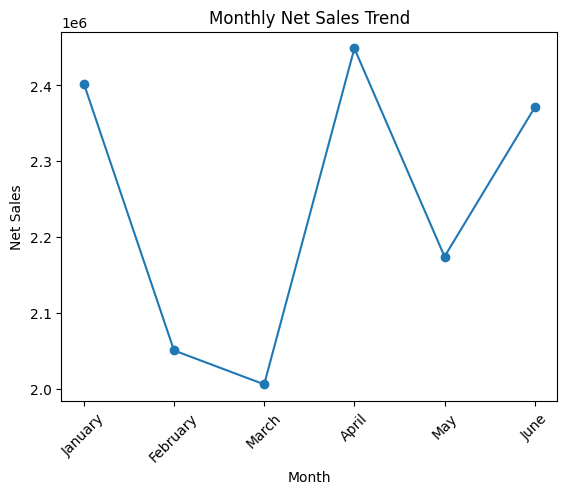

In [ ]:
# Monthly Revenue Trend
monthly_sales = (
    df.groupby(['Year', 'Month', 'Month_Name'])['Net_Sales']
      .sum()
      .reset_index()
      .sort_values(['Year', 'Month'])
)

plt.figure()
plt.plot(monthly_sales['Month_Name'], monthly_sales['Net_Sales'], marker='o')
plt.title('Monthly Net Sales Trend')
plt.xlabel('Month')
plt.ylabel('Net Sales')
plt.xticks(rotation=45)
plt.show()


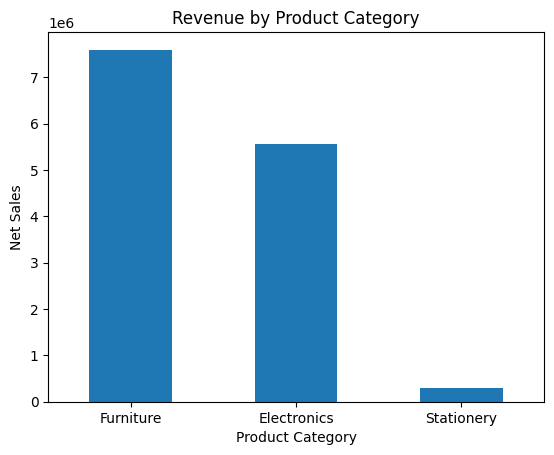

In [49]:
# Revenue by Product Category
category_sales = (
    df.groupby('Product_Category')['Net_Sales']
      .sum()
      .sort_values(ascending=False)
)

plt.figure()
category_sales.plot(kind='bar')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Net Sales')
plt.xticks(rotation=0)
plt.show()

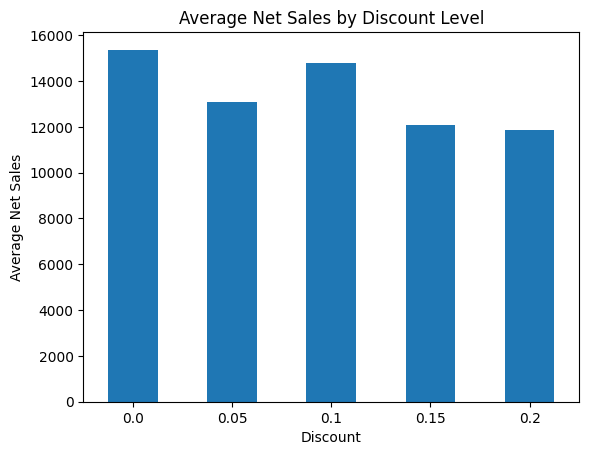

In [50]:
# Discount vs Revenue
discount_sales = (
    df.groupby('Discount')['Net_Sales']
      .mean()
      .round(0)
)

plt.figure()
discount_sales.plot(kind='bar')
plt.title('Average Net Sales by Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average Net Sales')
plt.xticks(rotation=0)
plt.show()

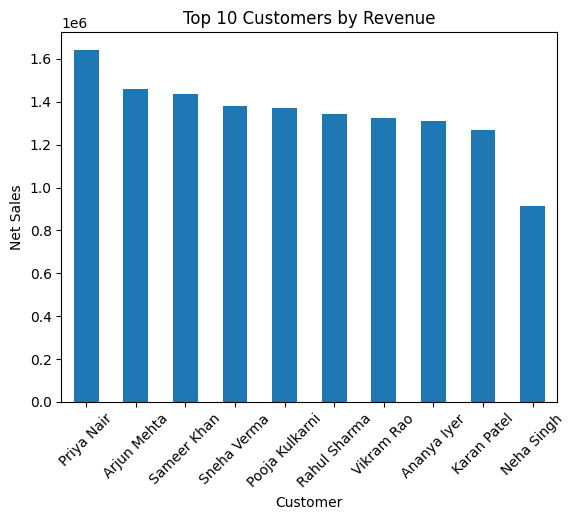

In [53]:
# Top 10 Customers by Revenue
top_customers = (
    df.groupby('Customer_Name')['Net_Sales']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top_customers.plot(kind='bar')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer')
plt.ylabel('Net Sales')
plt.xticks(rotation=45)
plt.show()

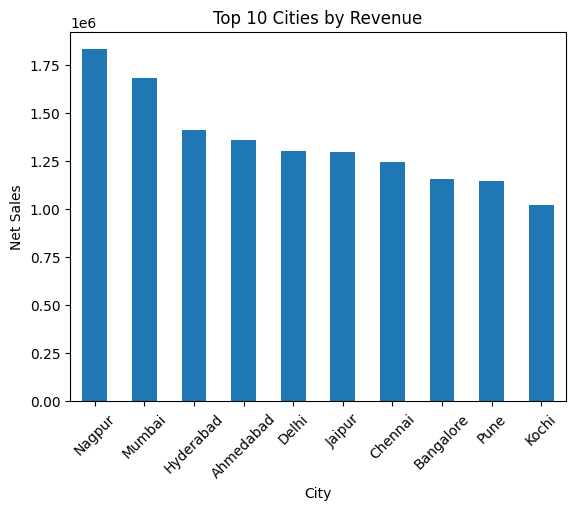

In [54]:
# City-wise Revenue
city_sales = (
    df.groupby('City')['Net_Sales']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
city_sales.plot(kind='bar')
plt.title('Top 10 Cities by Revenue')
plt.xlabel('City')
plt.ylabel('Net Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
'''
1️⃣ Monthly Net Sales Trend
❓ Question

How does revenue change over time, and are there any seasonal patterns?

💡 Insight

Net sales peak noticeably in January and April, indicating seasonal demand spikes at the beginning of the year and early Q2. Other months show relatively stable but lower sales levels.

✅ Recommendation

Plan marketing campaigns and promotions ahead of January and April.

Ensure higher inventory availability during these peak months to avoid stockouts.

Investigate what drives these peaks (festive sales, corporate budgets, promotions) and replicate successful strategies.

2️⃣ Revenue by Product Category
❓ Question

Which product categories contribute the most to overall revenue?

💡 Insight

Furniture generates the highest total revenue among all categories, driven by high-priced items. Electronics, while contributing slightly less overall, includes high-impact individual products.

✅ Recommendation

Maintain a strong focus on Furniture as a core revenue driver.

Use Electronics strategically for volume growth and targeted promotions.

Allocate marketing budgets proportionally, while preserving margins on high-value furniture products.

3️⃣ Discount vs Average Net Sales
❓ Question

Do higher discounts lead to higher revenue?

💡 Insight

Average net sales decline as discount levels increase, indicating that higher discounts erode revenue rather than boost demand. However, a moderate discount (around 10%) performs better than higher discount levels, especially in Electronics.

✅ Recommendation

Avoid blanket high-discount strategies across all categories.

Apply selective and moderate discounts (≈10%) only where demand is price-sensitive.

Protect margins on high-demand products by minimizing unnecessary discounts.

4️⃣ Top 10 Customers by Revenue
❓ Question

Who are the most valuable customers in terms of revenue?

💡 Insight

A small group of customers contributes a disproportionately high share of total revenue, with the top customer leading in both order frequency and total spending.

✅ Recommendation

Prioritize high-value customers with loyalty programs and personalized offers.

Provide priority support and retention-focused engagement to reduce churn risk.

Monitor dependency on top customers and develop strategies to grow mid-tier customers.

5️⃣ Top 10 Cities by Revenue
❓ Question

Which cities generate the highest sales?

💡 Insight

Nagpur and Mumbai are the top-performing cities in terms of revenue, indicating strong regional demand and effective market penetration in these locations.

✅ Recommendation

Focus regional marketing campaigns and inventory planning in top-performing cities.

Strengthen logistics and delivery efficiency in these regions.

Use high-performing cities as benchmarks for expansion into similar markets.

6️⃣ Order Status Distribution
❓ Question

What is the overall health of order fulfillment and operations?

💡 Insight

The majority of orders are successfully completed, with relatively fewer cancellations and returns. This suggests a generally healthy order fulfillment process.

✅ Recommendation

Maintain current operational standards to sustain high completion rates.

Analyze reasons for cancellations and returns to identify preventable issues.

Implement quality checks and customer communication improvements to further reduce returns.

'''